In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [5]:
data = pd.read_excel('Data_Analytics_Take_Home_HL_repaired.xlsx')

In [16]:
data[data['Conversion'] == 1].head()
data[data['Conversion']==0]

,pageview_id,User ID,known_diagnosis,page_category,Device_Type,page_topic_description,session_start_time,asset_loaded_time,time of day,Return Visitor,Asset Shown,Conversion
0,14afd810-bee0-4dde-984a-f36e5082cc13,00007820-89cb-4c1d-9940-eb270d605a35,,nauseaandvomiting,tablet,abdominal_pain,45164.387613,45164.388195,9,0,B,0
1,264d4634-8b76-4043-aa6a-768225dba92b,00012b55-514c-421e-9c76-3300abbc1134,,nauseaandvomiting,mobile,abdominal_pain,45151.782681,45151.783348,18,0,B,0
2,8759fa0b-3596-4306-b46c-aa2303490211,000157c1-b6a3-4c86-82c7-9ec1bda3799a,Ulcerative Colitis,nauseaandvomiting,desktop,food_poisoning,45166.471808,45166.472273,11,0,A,0
3,287d4980-19be-4654-bdd0-344ab656bcc3,00020400-efab-4b10-8812-2a0aaf774841,,nauseaandvomiting,tablet,food_poisoning,45150.016442,45150.016804,0,1,A,0
4,4c6e84c5-448d-4211-a307-a1e26a34f8ea,0002f737-0cda-48fb-91ed-533f3d0eab05,,nauseaandvomiting,mobile,food_poisoning,45145.478711,45145.479199,11,0,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,d6257fa9-c1b2-4e9d-a4d4-4201f7495270,fffb48e8-fc77-49fe-ab4e-e99a0829a788,,otherinflammatoryboweldisease,desktop,exercise_benefits_for_disease,45168.497630,45168.498301,11,0,A,0
99996,7172b3e3-031a-45e0-a526-8051626acd07,fffb63e2-b1d6-4d73-b766-44ba50203c00,,nauseaandvomiting,tablet,abdominal_pain,45149.962140,45149.962799,23,0,B,0
99997,fb4bab94-fd43-41c1-8bf0-620a7c062a5f,fffba42b-265f-4269-a6d5-c8db7e3bd430,,otherdigestiveproblems,mobile,science_supported_diets,45161.328472,45161.328856,7,0,C,0
99998,3397bd27-e7bf-4eba-b1bd-afe41aebf4b6,fffd8e45-d5f8-4b06-b1a4-2d4bf527ee51,,otherdigestiveproblems,desktop,science_supported_diets,45168.406801,45168.407333,9,0,C,0


### Data Distribution Analysis

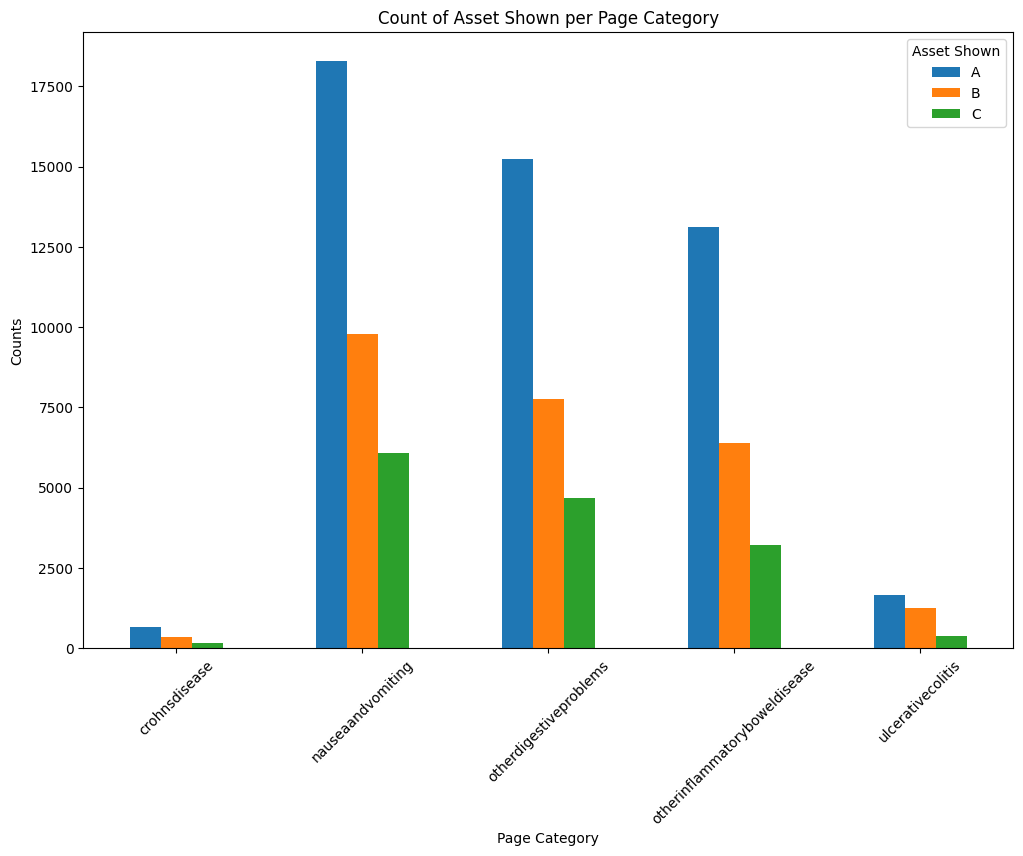

In [23]:
data_no_conversion = data[data['Conversion']==0]
grouped_counts = data_no_conversion.groupby(['page_category', 'Asset Shown']).size().unstack()

# Plotting
grouped_counts.plot(kind='bar', figsize=(12, 8))
plt.title('Count of Asset Shown per Page Category')
plt.xlabel('Page Category')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Asset Shown')
plt.show()

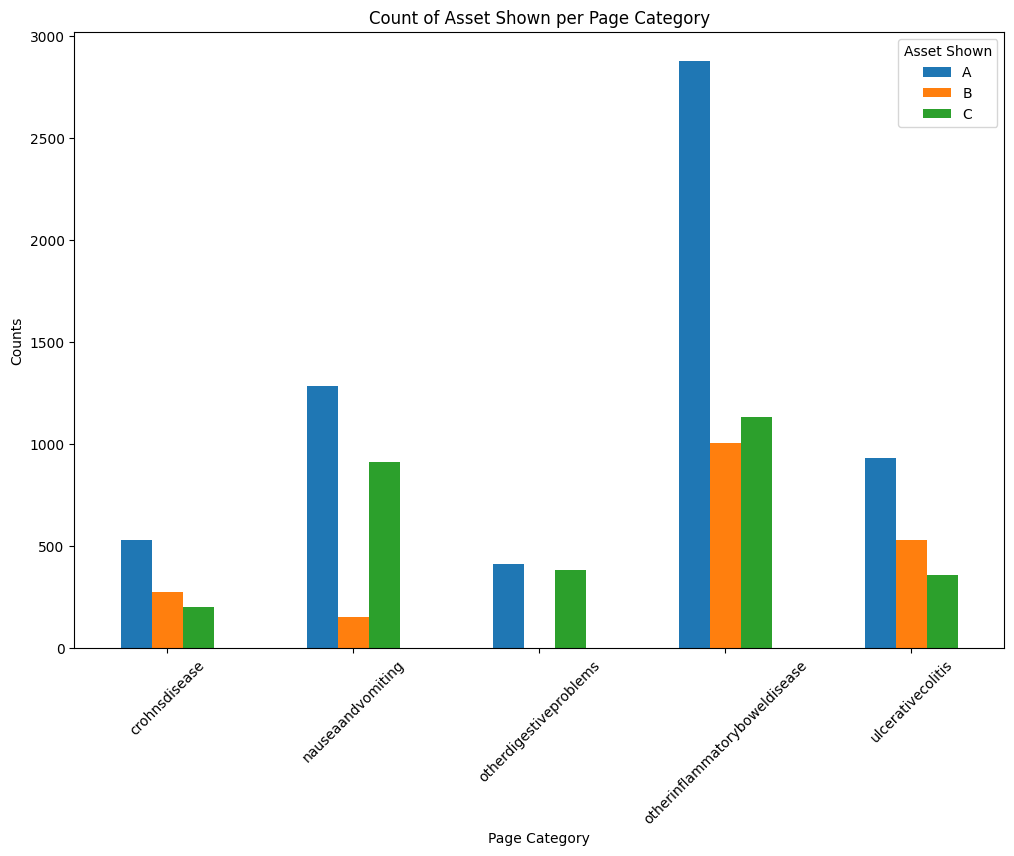

In [19]:
data_conversion = data[data['Conversion']==1]
grouped_counts = data_conversion.groupby(['page_category', 'Asset Shown']).size().unstack()

# Plotting
grouped_counts.plot(kind='bar', figsize=(12, 8))
plt.title('Count of Asset Shown per Page Category')
plt.xlabel('Page Category')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Asset Shown')
plt.show()

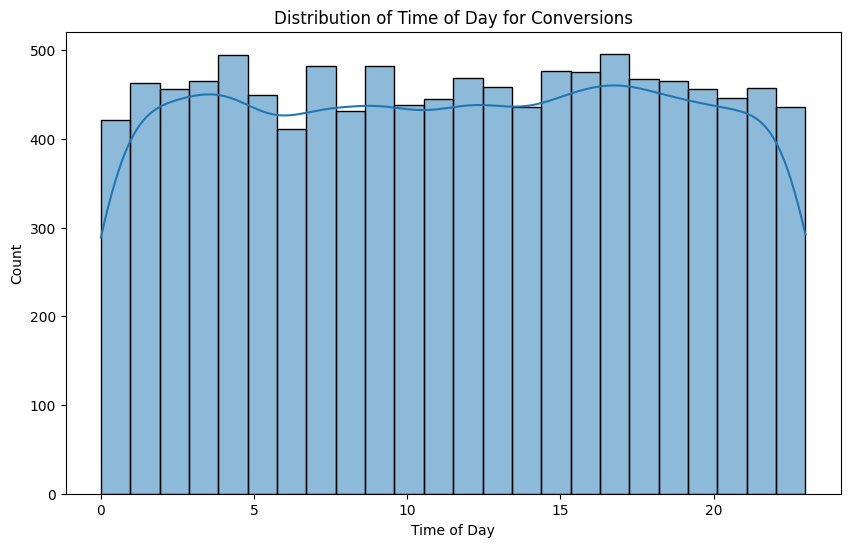

In [33]:
conversion_data = data[data['Conversion'] == 1]

# Plotting the distribution of 'time of day' for conversions
plt.figure(figsize=(10, 6))
sns.histplot(conversion_data['time of day'], bins=24, kde=True)  # 24 bins for 24 hours
plt.title('Distribution of Time of Day for Conversions')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()

### Descriptive Statistics

In [181]:
def calculate_conversion_rate(data, column_name):
    conversions = data[data['Conversion'] == 1].groupby(column_name)['Conversion'].count()
    total_shown = data.groupby(column_name)['Conversion'].count()
    conversion_rate = (conversions / total_shown) * 100
    print(conversion_rate)
    print('\n')
    return conversion_rate

def calculate_revenue(data, column_name):
    converted_data = data[data['Conversion'] == 1]
    asset_revenues = np.array([5, 7, 2.5])
    conversions_temp = converted_data.groupby([column_name, 'Asset Shown'])
    conversions_table = conversions_temp.size().reset_index(name='counts')
    conversions = conversions_temp.size().to_numpy()
    repeated_revenues = np.tile(asset_revenues, int(np.ceil(len(conversions)/len(asset_revenues))))[:len(conversions)]
    total_revenue = conversions * repeated_revenues
    sum(total_revenue)
    conversions_table = conversions_temp.size().reset_index(name='counts')
    conversions_table['Revenue'] = total_revenue
    return conversions_table, conversions_table.groupby(column_name)['Revenue'].sum()

calculate_revenue(data, 'page_category')

(                    page_category Asset Shown  counts  Revenue
 0                   crohnsdisease           A     528   2640.0
 1                   crohnsdisease           B     273   1911.0
 2                   crohnsdisease           C     201    502.5
 3               nauseaandvomiting           A    1285   6425.0
 4               nauseaandvomiting           B     153   1071.0
 5               nauseaandvomiting           C     910   2275.0
 6          otherdigestiveproblems           A     411   2055.0
 7          otherdigestiveproblems           C     382   2674.0
 8   otherinflammatoryboweldisease           A    2876   7190.0
 9   otherinflammatoryboweldisease           B    1006   5030.0
 10  otherinflammatoryboweldisease           C    1132   7924.0
 11              ulcerativecolitis           A     931   2327.5
 12              ulcerativecolitis           B     528   2640.0
 13              ulcerativecolitis           C     360   2520.0,
 page_category
 crohnsdisease          

In [177]:
data.columns

Index(['pageview_id', 'User ID', 'known_diagnosis', 'page_category',
       'Device_Type', 'page_topic_description', 'session_start_time',
       'asset_loaded_time', 'time of day', 'Return Visitor', 'Asset Shown',
       'Conversion'],
      dtype='object')

In [180]:
calculate_revenue(data, 'page_topic_description')

page_topic_description
abdominal_pain                   2292.5
alternative_medicine             2301.5
bleeding_and_blood_loss          2622.0
bloating                         1039.0
blood_tests                       812.5
brand_name_prescription_drugs    2286.5
diabetes_nutrition               7262.0
exercise_and_stress              1358.5
exercise_benefits_for_disease    7261.0
food_poisoning                   3293.0
gastrointestinal_bleeding        3593.0
gastrointestinal_procedures      1381.0
gut_bacteria                     1031.5
joint_pain                       2448.0
living_with_chronic_illness      5975.5
online_mental_healthcare         1234.0
preventative_care_exams          2318.0
probiotics_and_prebiotics        1267.0
science_supported_diets          1136.0
thyroid                          5050.0
Name: Revenue, dtype: float64

In [49]:
calculate_conversion_rate(data, 'Asset Shown')
calculate_conversion_rate(data, 'page_category')
calculate_conversion_rate(data, 'Device_Type')
calculate_conversion_rate(data, 'time of day')
calculate_conversion_rate(data, 'Return Visitor')

Asset Shown
A    10.965455
B     7.127273
C    17.057143
Name: Conversion, dtype: float64


page_category
crohnsdisease                    45.795247
nauseaandvomiting                 6.437286
otherdigestiveproblems            2.784899
otherinflammatoryboweldisease    18.061960
ulcerativecolitis                35.652685
Name: Conversion, dtype: float64


Device_Type
desktop    10.774945
mobile     11.181668
tablet     10.971353
Name: Conversion, dtype: float64


time of day
0     10.519740
1     11.306471
2     10.714286
3     11.159107
4     11.917973
5     10.483306
6     10.254491
7     11.419095
8     10.148340
9     11.503580
10    10.597629
11    10.638298
12    11.009390
13    11.041617
14    10.438113
15    11.444338
16    11.279981
17    11.767497
18    11.180273
19    10.974746
20    11.043836
21    10.880703
22    11.111111
23    10.564575
Name: Conversion, dtype: float64


Return Visitor
0     8.494661
1    23.651579
Name: Conversion, dtype: float64




Return Visitor
0     8.494661
1    23.651579
Name: Conversion, dtype: float64